In [124]:
# import numpy, matplotlib, and pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
# install and import lasio
!pip install lasio
import lasio

In [47]:
def shale_volume(gamma_ray, gamma_ray_max, gamma_ray_min):
    vshale = (gamma_ray - gamma_ray_min) / (gamma_ray_max - gamma_ray_min)
    return round(vshale, 4)

In [48]:
# THE VALUE INPUT BELOW ARE THE VALUES FOR GAMMA LOG, GAMMA RAY MAX, GAMMA_RAY MIN. ANY TIME YOU CHANGE THOSE VALUES, THE RESULT CHANGES

In [49]:
shale_volume(150, 180, 30)

0.8

In [50]:
def density_porosity(input_density, matrix_density, fluid_density):
    denpor = (matrix_density - input_density) / (matrix_density - fluid_density)
    return round(denpor,4)

(2,1.5,1)

(2, 1.5, 1)

In [51]:
density_porosity(2,1.5,1)

-1.0

In [88]:
def sw_archie(porosity, rt, rw, archieA, archieM, archieN):
    sw = ((archieA / (porosity ** archieM)) * (rw/rt))**(1/archieN)
    return sw

In [90]:
sw_archie(0.1, 10, 0.1, 1, 2, 2)

1.0

In [53]:
def sw_simandoux(phie, rt, rw, archieA, archieM, archieN, vshale, rshale):
    A = (1 - vshale) * archieA * rw / (phie ** archieM)
    B = A * vshale / (2 * rshale)
    C = A / rt
    
    sw = ((B **2 + C)**0.5 - B) **(2 / archieN)
    return sw

In [28]:
#las = lasio.read("WELLX.LAS")

In [29]:
#well = las.df()
#well.head(10)

In [30]:
#well.describe()

In [57]:
well = pd.read_csv("WELLX.csv",header=0)

In [58]:
well.head(20)

,DEPT,DRHO,RHOB,NPHI,DT,LLS,LLD,SP,GR,CALI
0,1930.2980,0.12547,2.40633,0.35454,111.00581,-999.25,-999.25,65.51746,83.76804,13.49674
1,1930.4504,0.11938,2.40781,0.35519,109.70728,-999.25,-999.25,65.54601,84.64990,13.55193
2,1930.6028,0.11767,2.40248,0.35908,108.90856,-999.25,-999.25,65.53445,84.67248,13.59299
3,1930.7552,0.12398,2.39724,0.36275,108.97500,-999.25,-999.25,65.47968,82.31470,13.64021
4,1930.9076,0.13360,2.39845,0.36954,109.31793,-999.25,-999.25,65.22883,78.49836,13.73909
5,1931.0600,0.13660,2.40113,0.38359,109.58739,-999.25,-999.25,64.72814,75.68652,13.87166
6,1931.2124,0.13096,2.39812,0.40046,109.77362,-999.25,-999.25,64.11302,75.53126,13.99622
7,1931.3648,0.12473,2.39271,0.41048,109.55687,-999.25,-999.25,63.41675,77.92982,14.12113
8,1931.5172,0.12389,2.39253,0.41143,109.34375,-999.25,-999.25,62.62346,81.11681,14.22128
9,1931.6696,0.11899,2.37609,0.41798,111.65599,-999.25,-999.25,61.69078,82.24657,14.45227


In [36]:
well.describe()

,DEPT,DRHO,RHOB,NPHI,DT,LLS,LLD,SP,GR,CALI
count,8169.000000,8169.000000,8169.000000,8169.000000,8169.000000,8169.000000,8169.000000,8169.000000,8169.000000,8169.000000
mean,2552.699600,-84.357517,-82.288291,-84.064215,12.550115,-78.015303,-77.509592,-39.123647,-0.796722,-71.316874
std,359.409722,277.906962,278.535519,277.996060,304.242128,274.020444,274.346672,288.925662,304.203596,281.876615
min,1930.298000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000
25%,2241.498800,0.004540,2.214010,0.298980,98.271220,1.204230,1.265690,33.817730,61.946540,12.070310
50%,2552.699600,0.038080,2.315610,0.368500,103.661470,1.437950,1.515790,42.251310,99.061260,13.784030
75%,2863.900400,0.078270,2.378160,0.422580,108.115460,1.720860,1.840060,58.714680,107.346830,15.612780
max,3175.101200,0.178680,2.515060,0.532170,127.412810,251.316010,392.098450,74.366390,174.970310,22.155370


In [ ]:
# I decided to change a column header LLD to RT since RT is what I inputed into my algorithm to compute SW

In [79]:
#well.loc[:, ["DEPT","DRHO","RHOB","NPHI","DT","LLS","LLD","SP","GR","CALI"]]

In [80]:

well.rename(
    columns=({ 'LLD': 'RT'}), 
    inplace=True,
)

In [81]:
well.replace(-999.25, np.nan, inplace=True)

In [82]:
well.head(100)

,DEPT,DRHO,RHOB,NPHI,DT,LLS,RT,SP,GR,CALI,VSHALE,PHI
0,1930.2980,0.12547,2.40633,0.35454,111.00581,NaN,NaN,65.51746,83.76804,13.49674,0.9628,0.1477
1,1930.4504,0.11938,2.40781,0.35519,109.70728,NaN,NaN,65.54601,84.64990,13.55193,0.9636,0.1468
2,1930.6028,0.11767,2.40248,0.35908,108.90856,NaN,NaN,65.53445,84.67248,13.59299,0.9636,0.1500
3,1930.7552,0.12398,2.39724,0.36275,108.97500,NaN,NaN,65.47968,82.31470,13.64021,0.9615,0.1532
4,1930.9076,0.13360,2.39845,0.36954,109.31793,NaN,NaN,65.22883,78.49836,13.73909,0.9581,0.1525
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1944.7760,0.01128,2.27163,0.41338,118.26721,NaN,NaN,59.82169,90.87435,18.42096,0.9691,0.2293
96,1944.9284,0.01190,2.27455,0.41324,118.10140,NaN,NaN,59.74581,90.11735,18.35501,0.9684,0.2275
97,1945.0808,0.01708,2.27823,0.43294,118.01127,NaN,NaN,59.63450,90.30630,18.15553,0.9686,0.2253
98,1945.2332,0.02574,2.28226,0.45210,118.06096,NaN,NaN,59.54816,91.58956,17.93170,0.9697,0.2229


In [91]:
#well.replace("LLD", "RT")

In [92]:
well.head(10)

,DEPT,DRHO,RHOB,NPHI,DT,LLS,RT,SP,GR,CALI,VSHALE,PHI
0,1930.2980,0.12547,2.40633,0.35454,111.00581,NaN,NaN,65.51746,83.76804,13.49674,0.9628,0.1477
1,1930.4504,0.11938,2.40781,0.35519,109.70728,NaN,NaN,65.54601,84.64990,13.55193,0.9636,0.1468
2,1930.6028,0.11767,2.40248,0.35908,108.90856,NaN,NaN,65.53445,84.67248,13.59299,0.9636,0.1500
3,1930.7552,0.12398,2.39724,0.36275,108.97500,NaN,NaN,65.47968,82.31470,13.64021,0.9615,0.1532
4,1930.9076,0.13360,2.39845,0.36954,109.31793,NaN,NaN,65.22883,78.49836,13.73909,0.9581,0.1525
5,1931.0600,0.13660,2.40113,0.38359,109.58739,NaN,NaN,64.72814,75.68652,13.87166,0.9556,0.1508
6,1931.2124,0.13096,2.39812,0.40046,109.77362,NaN,NaN,64.11302,75.53126,13.99622,0.9555,0.1527
7,1931.3648,0.12473,2.39271,0.41048,109.55687,NaN,NaN,63.41675,77.92982,14.12113,0.9576,0.1559
8,1931.5172,0.12389,2.39253,0.41143,109.34375,NaN,NaN,62.62346,81.11681,14.22128,0.9604,0.1560
9,1931.6696,0.11899,2.37609,0.41798,111.65599,NaN,NaN,61.69078,82.24657,14.45227,0.9614,0.1660


In [93]:
#Calculate Shale Volume
well['VSHALE'] = shale_volume(well['GR'], well['GR'].quantile(q=0.99),
                             well['GR'].quantile(q=0.01))

In [94]:
#Calculate density porosity
well['PHI'] = density_porosity(well['RHOB'], 2.65, 1)

In [95]:
#Calculate PHIE
well['PHIECALC'] = well['PHI'] - (well['VSHALE'] * 0.3)

In [96]:
well.head(2000)

,DEPT,DRHO,RHOB,NPHI,DT,LLS,RT,SP,GR,CALI,VSHALE,PHI,PHIECALC
0,1930.2980,0.12547,2.40633,0.35454,111.00581,NaN,NaN,65.51746,83.76804,13.49674,0.5354,0.1477,-0.01292
1,1930.4504,0.11938,2.40781,0.35519,109.70728,NaN,NaN,65.54601,84.64990,13.55193,0.5452,0.1468,-0.01676
2,1930.6028,0.11767,2.40248,0.35908,108.90856,NaN,NaN,65.53445,84.67248,13.59299,0.5454,0.1500,-0.01362
3,1930.7552,0.12398,2.39724,0.36275,108.97500,NaN,NaN,65.47968,82.31470,13.64021,0.5194,0.1532,-0.00262
4,1930.9076,0.13360,2.39845,0.36954,109.31793,NaN,NaN,65.22883,78.49836,13.73909,0.4774,0.1525,0.00928
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2234.3360,0.00728,2.34094,0.34585,110.38593,2.01114,2.04429,59.62980,103.74769,12.35938,0.7555,0.1873,-0.03935
1996,2234.4884,0.00836,2.34428,0.33578,110.13213,1.98718,2.00963,59.26844,103.69428,12.35938,0.7549,0.1853,-0.04117
1997,2234.6408,0.00881,2.34543,0.32840,110.08492,1.94427,1.96094,58.83307,102.99860,12.35938,0.7472,0.1846,-0.03956
1998,2234.7932,0.01341,2.34729,0.33696,110.20253,1.88890,1.90003,58.28030,100.77388,12.35938,0.7227,0.1835,-0.03331


In [99]:
#Calculate Archie SW
well['SW'] = sw_archie(well['PHI'], well['RT'], 0.028, 1, 2, 2)

In [101]:
well.head(200)

,DEPT,DRHO,RHOB,NPHI,DT,LLS,RT,SP,GR,CALI,VSHALE,PHI,PHIECALC,SW
0,1930.2980,0.12547,2.40633,0.35454,111.00581,NaN,NaN,65.51746,83.76804,13.49674,0.5354,0.1477,-0.01292,NaN
1,1930.4504,0.11938,2.40781,0.35519,109.70728,NaN,NaN,65.54601,84.64990,13.55193,0.5452,0.1468,-0.01676,NaN
2,1930.6028,0.11767,2.40248,0.35908,108.90856,NaN,NaN,65.53445,84.67248,13.59299,0.5454,0.1500,-0.01362,NaN
3,1930.7552,0.12398,2.39724,0.36275,108.97500,NaN,NaN,65.47968,82.31470,13.64021,0.5194,0.1532,-0.00262,NaN
4,1930.9076,0.13360,2.39845,0.36954,109.31793,NaN,NaN,65.22883,78.49836,13.73909,0.4774,0.1525,0.00928,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1960.0160,0.00920,2.28694,0.44449,117.95847,1.28457,1.40891,58.46376,81.29788,20.18560,0.5082,0.2200,0.06754,0.640789
196,1960.1684,0.00627,2.28044,0.44418,116.97705,1.29285,1.41915,58.33099,81.55044,19.90044,0.5110,0.2240,0.07070,0.627071
197,1960.3208,0.00352,2.27436,0.42915,116.21783,1.30725,1.43785,58.26171,82.28543,19.65640,0.5191,0.2277,0.07197,0.612857
198,1960.4732,0.00319,2.27120,0.40824,115.56086,1.32314,1.46480,58.21283,81.65868,19.47375,0.5122,0.2296,0.07594,0.602168


In [107]:
#Calculate Simandoux SW
well['SW_SIM'] = sw_simandoux(well['PHIECALC'], well['RT'], 0.028, 1, 2, 2, well['VSHALE'],2)

In [108]:
#Limit SW to 1
well['SW_LIM'] = well['SW'].mask(well['SW']>1, 1)
well['SW__SIM_LIM'] = well['SW_SIM'].mask(well['SW_SIM']>1, 1)

In [112]:
well.describe()

,DEPT,DRHO,RHOB,NPHI,DT,LLS,RT,SP,GR,CALI,VSHALE,PHI,PHIECALC,SW,SW_SIM,SW_LIM,SW__SIM_LIM
count,8169.000000,7479.000000,7479.000000,7479.000000,7492.000000,7506.000000,7506.000000,7492.000000,7479.000000,7479.000000,7479.000000,7479.000000,7479.000000,7352.000000,7277.000000,7352.000000,7277.000000
mean,2552.699600,0.048930,2.309059,0.369291,103.979463,3.356746,3.907127,47.636302,91.318903,14.292680,0.618602,0.206630,0.021049,0.669619,0.772905,0.666808,0.666594
std,359.409722,0.042521,0.093238,0.071663,6.904570,11.200623,15.183628,13.507340,24.630642,2.279895,0.271279,0.056508,0.124480,0.209045,0.456786,0.203347,0.268479
min,1930.298000,-0.029920,1.833150,0.104700,63.613780,0.839590,0.898130,19.788110,29.674670,5.667970,-0.060300,0.081800,-0.181820,0.028291,0.006759,0.028291,0.006759
25%,2241.498800,0.010430,2.243165,0.315160,100.026655,1.277178,1.340040,36.819688,80.024625,12.261365,0.494200,0.162400,-0.076190,0.561477,0.483486,0.561477,0.483486
50%,2552.699600,0.044930,2.328960,0.381420,104.331335,1.475395,1.556140,47.404540,100.744250,14.180600,0.722400,0.194600,-0.020660,0.673691,0.654471,0.673691,0.654471
75%,2863.900400,0.081870,2.382025,0.426145,108.480470,1.765270,1.888737,59.348710,108.025485,15.822475,0.802600,0.246600,0.108775,0.814063,0.970481,0.814063,0.970481
max,3175.101200,0.178680,2.515060,0.532170,127.412810,251.316010,392.098450,74.366390,174.970310,22.155370,1.539900,0.495100,0.345300,1.628313,2.689409,1.000000,1.000000


In [116]:
well.head(500)

,DEPT,DRHO,RHOB,NPHI,DT,LLS,RT,SP,GR,CALI,VSHALE,PHI,PHIECALC,SW,SW_SIM,SW_LIM,SW__SIM_LIM
0,1930.2980,0.12547,2.40633,0.35454,111.00581,NaN,NaN,65.51746,83.76804,13.49674,0.5354,0.1477,-0.01292,NaN,NaN,NaN,NaN
1,1930.4504,0.11938,2.40781,0.35519,109.70728,NaN,NaN,65.54601,84.64990,13.55193,0.5452,0.1468,-0.01676,NaN,NaN,NaN,NaN
2,1930.6028,0.11767,2.40248,0.35908,108.90856,NaN,NaN,65.53445,84.67248,13.59299,0.5454,0.1500,-0.01362,NaN,NaN,NaN,NaN
3,1930.7552,0.12398,2.39724,0.36275,108.97500,NaN,NaN,65.47968,82.31470,13.64021,0.5194,0.1532,-0.00262,NaN,NaN,NaN,NaN
4,1930.9076,0.13360,2.39845,0.36954,109.31793,NaN,NaN,65.22883,78.49836,13.73909,0.4774,0.1525,0.00928,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2005.7360,-0.00572,2.15774,0.30352,106.96197,1.01358,1.06668,72.48431,53.90207,12.26585,0.2065,0.2983,0.23635,0.543136,0.590444,0.543136,0.590444
496,2005.8884,-0.00381,2.17178,0.29598,105.88461,1.02782,1.08300,72.49621,54.20703,12.30670,0.2099,0.2898,0.22683,0.554838,0.607935,0.554838,0.607935
497,2006.0408,0.00027,2.19028,0.28408,105.50031,1.02809,1.08257,72.37882,50.58506,12.37350,0.1700,0.2786,0.22760,0.577258,0.624966,0.577258,0.624966
498,2006.1932,0.00671,2.20236,0.27597,105.55888,1.01753,1.06975,72.19642,45.30151,12.46438,0.1118,0.2713,0.23776,0.596332,0.629112,0.596332,0.629112


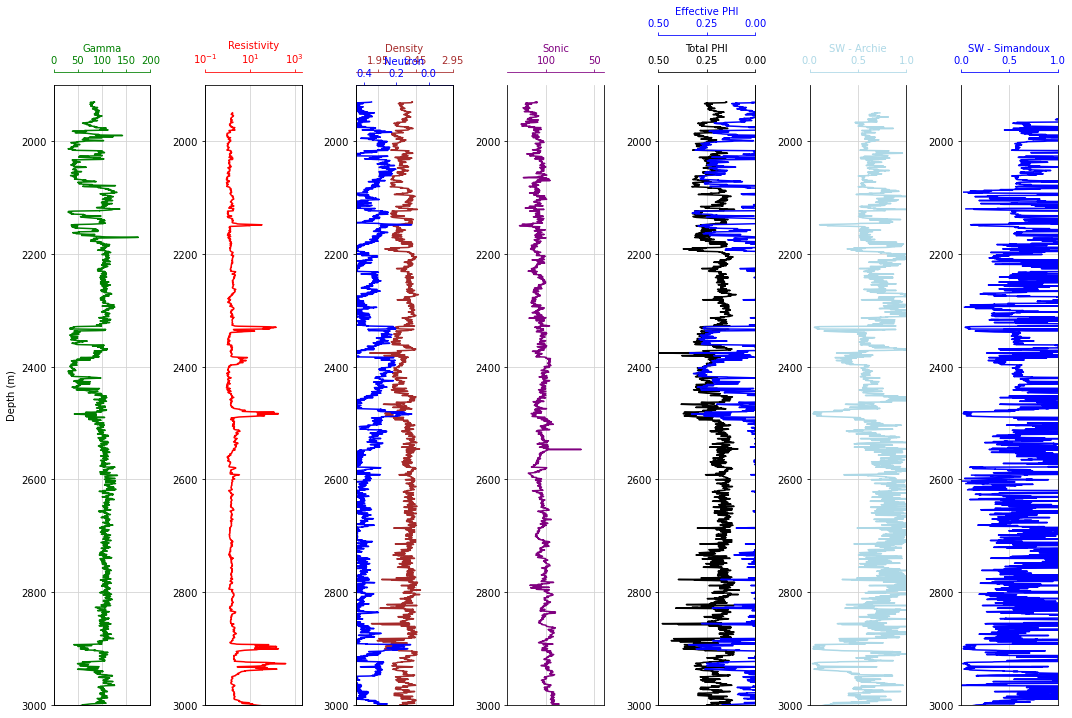

In [162]:
fig, ax = plt.subplots(figsize=(15,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,7), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,7), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,7), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,7), (0,3), rowspan=1, colspan = 1)
ax5 = ax3.twiny() #Twins the y-axis for the density track with the neutron track
ax6 = plt.subplot2grid((1,7), (0,4), rowspan=1, colspan = 1)
ax7 = ax6.twiny()
ax8 = plt.subplot2grid((1,7), (0,5), rowspan=1, colspan = 1)
ax9 = plt.subplot2grid((1,7), (0,6), rowspan=1, colspan = 1)

# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax10 = ax1.twiny()
ax10.xaxis.set_visible(False)
ax11 = ax2.twiny()
ax11.xaxis.set_visible(False)
ax12 = ax3.twiny()
ax12.xaxis.set_visible(False)



# Gamma Ray track
ax1.plot("GR", "DEPT", data = well, color = "green")
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 200)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150, 200])


# Resistivity track
ax2.plot("RT", "DEPT", data = well, color = "red")
ax2.set_xlabel("Resistivity")
ax2.set_xlim(0.2, 2000)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([0.1, 1, 10, 100, 1000])
ax2.semilogx()



# Density track
ax3.plot("RHOB", "DEPT", data = well, color = "brown")
ax3.set_xlabel("Density")
ax3.set_xlim(1.65, 2.65)
ax3.xaxis.label.set_color("brown")
ax3.tick_params(axis='x', colors="brown")
ax3.spines["top"].set_edgecolor("brown")
ax3.set_xticks([1.95, 2.45, 2.95])

# Sonic track
ax4.plot("DT", "DEPT", data = well, color = "purple")
ax4.set_xlabel("Sonic")
ax4.set_xlim(140, 40)
ax4.xaxis.label.set_color("purple")
ax4.tick_params(axis='x', colors="purple")
ax4.spines["top"].set_edgecolor("purple")


#Neutron track alone
ax5.plot("NPHI", "DEPT", data= well, color= "blue")
ax5.set_xlabel("Neutron")
ax5.set_xlim(0.45, -0.15)
ax5.xaxis.label.set_color("blue")
ax5.tick_params(axis='x',colors='blue')
ax5.spines["top"].set_edgecolor("blue")


# Neutron track placed ontop of density track
#ax5.plot("NPHI", "DEPT", data = well, color = "blue")
#ax5.set_xlabel('Neutron')
#ax5.xaxis.label.set_color("blue")
#ax5.set_xlim(0.45, -0.15)
#ax5.set_ylim(4150, 3500)
#ax5.tick_params(axis='x', colors="blue")
#ax5.spines["top"].set_position(("axes", 1.08))
#ax5.spines["top"].set_visible(True)
#ax5.spines["top"].set_edgecolor("blue")
#ax5.set_xticks([0.45,  0.15, -0.15])




# Porosity track
ax6.plot("PHI", "DEPT", data = well, color = "black")
ax6.set_xlabel("Total PHI")
ax6.set_xlim(0.5, 0)
ax6.xaxis.label.set_color("black")
ax6.tick_params(axis='x', colors="black")
ax6.spines["top"].set_edgecolor("black")
ax6.set_xticks([0, 0.25, 0.5])

# Porosity track
ax7.plot("PHIECALC", "DEPT", data = well, color = "blue")
ax7.set_xlabel("Effective PHI")
ax7.set_xlim(0.5, 0)
ax7.xaxis.label.set_color("blue")
ax7.tick_params(axis='x', colors="blue")
ax7.spines["top"].set_position(("axes", 1.08))
ax7.spines["top"].set_visible(True)
ax7.spines["top"].set_edgecolor("blue")
ax7.set_xticks([0, 0.25, 0.5])

# Sw track
ax8.plot("SW_LIM", "DEPT", data = well, color = "lightblue")
ax8.set_xlabel("SW - Archie")
ax8.set_xlim(0, 1)
ax8.xaxis.label.set_color("lightblue")
ax8.tick_params(axis='x', colors="lightblue")
ax8.spines["top"].set_edgecolor("lightblue")
ax8.set_xticks([0, 0.5, 1])


# Sw track
ax9.plot("SW_SIM", "DEPT", data = well, color = "blue")
ax9.set_xlabel("SW - Simandoux")
ax9.set_xlim(0, 1)
ax9.xaxis.label.set_color("blue")
ax9.tick_params(axis='x', colors="blue")
ax9.spines["top"].set_edgecolor("blue")
ax9.set_xticks([0, 0.5, 1])

for ax in [ax1, ax2, ax3, ax4, ax6, ax8, ax9]:
    ax.set_ylim(3000, 1900)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    
plt.tight_layout()

<Figure size 432x288 with 0 Axes>